# 实验：多项式曲线拟合

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import functools

from sklearn import linear_model

## 1. 随机生成测试数据

In [61]:
def gen_data(func, num, std):
    # Returns num evenly spaced samples, calculated over the interval [start, stop].
    x = np.linspace(0, 1, num)
    print(x.shape)
    y = func(x) + np.random.normal(scale = std, size = x.shape)
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

生成含噪声的训练数据和不含噪声的测试数据

In [62]:
x_train, y_train = gen_data(func, 10, 0.25)

x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

(10L,)


绘制训练数据的散点图（以蓝色圆圈表示）；测试数据用于绘制基准曲线（绿色）

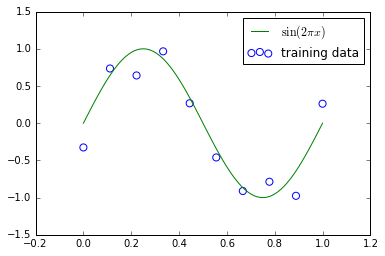

In [56]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s = 50, label="training data")
plt.plot(x_test, y_test, c = "g", label = "$\sin(2\pi x)$")
plt.legend()
plt.show()

## 2. 多项式曲线拟合

将输入的特征（矩阵）转换为多项式特征。

例如：样本的特征为 $(x_1, x_2)$，若指定最高次项为2，则相应的多项式特征为：$(1，x_1，x_2，x_1^2，x_2^2)$

参数说明：输入向量 x 为ndarray类型，维度是 (sample_size, n)

输出向量output为与输入向量 x 对应的多项式特征矩阵，维度是 (sample_size, 1 + nC1 + ... + nCd) 

In [98]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a = np.array([1, 2, 3, 4, 5])
print(a)

[1 2 3 4 5]


In [99]:
print(a.shape)

(5L,)


In [100]:
b = a[:,None]
print(b.shape)

(5L, 1L)


In [101]:
print(b)

z = b.transpose()
print(z)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[1 2 3 4 5]]


In [127]:
list(itertools.combinations_with_replacement('ABC', 3))

[('A', 'A', 'A'),
 ('A', 'A', 'B'),
 ('A', 'A', 'C'),
 ('A', 'B', 'B'),
 ('A', 'B', 'C'),
 ('A', 'C', 'C'),
 ('B', 'B', 'B'),
 ('B', 'B', 'C'),
 ('B', 'C', 'C'),
 ('C', 'C', 'C')]

In [106]:
d = 4
features = [np.ones(len(a))]
print(features)

for degree in range(1, d):
    for items in itertools.combinations_with_replacement(z, degree):
        features.append(functools.reduce(lambda x, y: x * y, items))
print(features)

[array([ 1.,  1.,  1.,  1.,  1.])]
[array([ 1.,  1.,  1.,  1.,  1.]), array([1, 2, 3, 4, 5]), array([ 1,  4,  9, 16, 25]), array([  1,   8,  27,  64, 125])]


In [118]:
def transform(x, d):
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, d+1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()

对生成的训练数据进行多项式特征变换

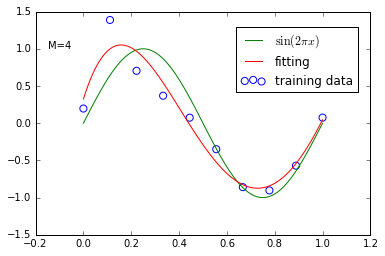

In [124]:
degree = 4
X_train = transform(x_train, degree)
X_test  = transform(x_test, degree)

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(0.98, 0.96))
plt.show()

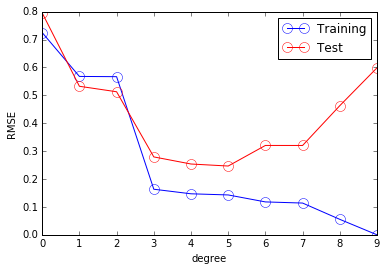

In [45]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):    
    X_train = transform(x_train, i+1)
    X_test  = transform(x_test, i+1)

    model = linear_model.LinearRegression()
    # Train the model using the training sets
    model.fit(X_train, y_train)
    # Make predictions using the testing set
    y = model.predict(X_test)
    
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

## Regularization

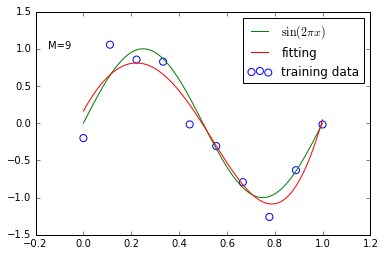

In [50]:
degree = 9
X_train = transform(x_train, degree)
X_test  = transform(x_test, degree)

# Create linear regression object
model = linear_model.Ridge(alpha = 1e-3)
# Train the model using the training sets
model.fit(X_train, y_train)
# Make predictions using the testing set
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()